In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tsplib95 
import networkx as nx
import pandas as pd
import time
start_time = time.time()
problem = tsplib95.load('dantzig42.tsp')
G = problem.get_graph()

In [29]:
tour = [1, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 21, 20, 19, 18, 16, 15, 14, 13, 17, 22, 23, 12, 11, 24, 27, 26, 25, 10, 9, 8, 3, 7, 6, 5, 4, 42, 2]

In [30]:
D_c = 20
df = pd.DataFrame({'cover point': [],
                   'set': []})
# df
# G
for i in range(len(tour)):
#     print(tour[i])
    tour1 = tour.copy()
    tour1.pop(i)
    lst = []
    for j in range(len(tour1)):
        if problem.get_weight(tour[i],tour1[j]) <= D_c:
            lst.append(tour1[j])
    new_row = pd.Series({'cover point': tour[i], 'set': lst})
    df = df.append(new_row,ignore_index=True)
print(df)
    
            

    cover point                    set
0           1.0            [41, 42, 2]
1          41.0             [1, 42, 2]
2          40.0            [39, 38, 5]
3          39.0            [40, 38, 5]
4          38.0        [40, 39, 37, 5]
5          37.0           [38, 36, 35]
6          36.0               [37, 35]
7          35.0           [37, 36, 34]
8          34.0           [35, 32, 31]
9          33.0                   [32]
10         32.0       [34, 33, 31, 30]
11         31.0           [34, 32, 30]
12         30.0       [32, 31, 29, 28]
13         29.0               [30, 28]
14         28.0           [30, 29, 27]
15         21.0                     []
16         20.0                     []
17         19.0                     []
18         18.0                     []
19         16.0                     []
20         15.0                   [14]
21         14.0                   [15]
22         13.0                     []
23         17.0                     []
24         22.0          

In [31]:
covered_points = set()
path = []

while len(covered_points) < len(tour):
    # find the row with the longest 'set', excluding rows whose 'cover point' is already covered
    available_rows = df[~df['cover point'].isin(covered_points)]
    if available_rows.empty:  # If no available rows, break the loop
        break
    best_row = available_rows.loc[available_rows['set'].str.len().idxmax()]
    
    # add the 'cover point' to the path
    path.append(int(best_row['cover point']))

    # add the points in 'set' to the covered points, also include 'cover point'
    covered_points.update(best_row['set'], {best_row['cover point']})

print(path)  # This will print the sequence of visited points
print(best_row)
# end_time = time.time()
# print(f"Runtime of the code is {end_time - start_time} seconds")


[8, 5, 32, 27, 1, 37, 29, 10, 15, 22, 12, 21, 20, 19, 18, 16, 13, 17]
cover point    17.0
set              []
Name: 23, dtype: object


In [18]:
covered_points = set()
path = []
cover_dict = {}  # 用于存储每个'cover point'的覆盖点

while len(covered_points) < len(tour):
    # find the row with the longest 'set', excluding rows whose 'cover point' is already covered
    available_rows = df[~df['cover point'].isin(covered_points)]
    if available_rows.empty:  # If no available rows, break the loop
        break
    best_row = available_rows.loc[available_rows['set'].str.len().idxmax()]
    
    # add the 'cover point' to the path
    path.append(int(best_row['cover point']))

    # add the points in 'set' to the covered points, also include 'cover point'
    covered_points.update(best_row['set'], {best_row['cover point']})

    # Store the covered points for the current 'cover point' in the dictionary
    cover_dict[int(best_row['cover point'])] = best_row['set']

print(path)  # This will print the sequence of visited points

# To print the cover points for each point in the path:
for point in path:
    print(f"Point {point} covers: {cover_dict[point]}")


[8, 5, 32, 27, 1, 37, 29, 10, 15, 22, 12, 21, 20, 19, 18, 16, 13, 17]
Point 8 covers: [25, 9, 3, 7, 6, 4]
Point 5 covers: [40, 39, 38, 7, 6, 4]
Point 32 covers: [34, 33, 31, 30]
Point 27 covers: [28, 24, 26, 25]
Point 1 covers: [41, 42, 2]
Point 37 covers: [38, 36, 35]
Point 29 covers: [30, 28]
Point 10 covers: [25, 9]
Point 15 covers: [14]
Point 22 covers: [23]
Point 12 covers: [11]
Point 21 covers: []
Point 20 covers: []
Point 19 covers: []
Point 18 covers: []
Point 16 covers: []
Point 13 covers: []
Point 17 covers: []


In [19]:
checked_points = {}
duplicate_points_info = {}

for cover_point, covered_set in cover_dict.items():
    for point in covered_set:
        if point in checked_points:
            duplicate_points_info.setdefault(point, []).append(checked_points[point])
            duplicate_points_info[point].append(cover_point)
        else:
            checked_points[point] = cover_point

# 打印重复的点以及对应的cover points
for dup_point, dup_sources in duplicate_points_info.items():
    print(f"重复的点 {dup_point} 出现在: {dup_sources}")


重复的点 7 出现在: [8, 5]
重复的点 6 出现在: [8, 5]
重复的点 4 出现在: [8, 5]
重复的点 25 出现在: [8, 27, 8, 10]
重复的点 38 出现在: [5, 37]
重复的点 30 出现在: [32, 29]
重复的点 28 出现在: [27, 29]
重复的点 9 出现在: [8, 10]


In [41]:
closest_points = {}
for dup_point, dup_sources in duplicate_points_info.items():
    closest_cover_point = min(dup_sources, key=lambda x: problem.get_weight(x, dup_point))
    closest_points[dup_point] = closest_cover_point

for dup_point, closest_cover_point in closest_points.items():
    for cover_point in duplicate_points_info[dup_point]:
        if cover_point != closest_cover_point and dup_point in cover_dict[cover_point]:
            cover_dict[cover_point].remove(dup_point)

for point in path:
    print(f"Point {point} covers: {cover_dict[point]}")
edges_data = [(k, v) for k, v in cover_dict.items() if v]

print(edges_data)


Point 8 covers: [9, 3, 7, 6]
Point 5 covers: [40, 39, 4]
Point 1 covers: [41, 42, 2]
Point 37 covers: [38, 36, 35]
Point 32 covers: [34, 33, 31, 30]
Point 29 covers: [28]
Point 27 covers: [24, 26]
Point 22 covers: [23]
Point 21 covers: []
Point 20 covers: []
Point 19 covers: []
Point 18 covers: []
Point 16 covers: []
Point 15 covers: [14]
Point 17 covers: []
Point 13 covers: []
Point 12 covers: [11]
Point 10 covers: [25]
[(8, [9, 3, 7, 6]), (5, [40, 39, 4]), (32, [34, 33, 31, 30]), (27, [24, 26]), (1, [41, 42, 2]), (37, [38, 36, 35]), (29, [28]), (10, [25]), (15, [14]), (22, [23]), (12, [11])]


In [42]:
single_pairs = [pair for pair in edges_data if len(pair[1]) == 1]
print(single_pairs)

[(29, [28]), (10, [25]), (15, [14]), (22, [23]), (12, [11])]


In [46]:
def compute_objective(path, problem, df):
    # Initialize the objective value to 0
    objective_value = 0

    # Traversal cost (cij*xij)
    for i in range(len(path) - 1):
        objective_value += problem.get_weight(path[i], path[i+1])

    # Add the distance from the last point back to the first point
    objective_value += problem.get_weight(path[-1], path[0])

    # Coverage cost (0.5*cij*uij)
    covered_edges = set()
    for _, row in df.iterrows():
        cover_point = int(row['cover point'])
        for point in row['set']:
            # Only consider the coverage cost for points in our selected path
            if cover_point in path:
                edge = tuple(sorted([cover_point, point]))  # To ensure (i, j) and (j, i) are treated the same
                if edge not in covered_edges:
                    objective_value += 0.5 * problem.get_weight(cover_point, point)
                    covered_edges.add(edge)
    
    return objective_value

initial_path = [8, 5, 1, 37, 32, 29, 27, 22, 21, 20, 19, 18, 16, 15, 17, 13, 12, 10]
initial_obj = compute_objective(initial_path, problem, df)

for pair in single_pairs:
    new_path = initial_path.copy()
    new_path[new_path.index(pair[0])] = pair[1][0]
    new_obj = compute_objective(new_path, problem, df)
    if new_obj < initial_obj:
        initial_path = new_path
        initial_obj = new_obj

print("Optimized Path:", initial_path)


Optimized Path: [8, 5, 1, 37, 32, 29, 27, 22, 21, 20, 19, 18, 16, 15, 17, 13, 12, 10]


In [26]:
def compute_objective_value(path, problem, df):
    objective_value = 0

    # Traversal cost (cij*xij)
    for i in range(len(path) - 1):
        objective_value += problem.get_weight(path[i], path[i+1])
    
    # Add the distance from the last point back to the first point
    objective_value += problem.get_weight(path[-1], path[0])

    # Coverage cost (0.5*cij*uij)
    covered_edges = set()
    for _, row in df.iterrows():
        cover_point = int(row['cover point'])
        for point in row['set']:
            # Only consider the coverage cost for points in our selected path
            if cover_point in path:
                edge = tuple(sorted([cover_point, point]))  # To ensure (i, j) and (j, i) are treated the same
                if edge not in covered_edges:
                    objective_value += 0.5 * problem.get_weight(cover_point, point)
                    covered_edges.add(edge)

    return objective_value


In [32]:
# Initialize the objective value to 0
objective_value = 0

# Traversal cost (cij*xij)
for i in range(len(path) - 1):
    objective_value += problem.get_weight(path[i], path[i+1])

# Add the distance from the last point back to the first point
objective_value += problem.get_weight(path[-1], path[0])

# Coverage cost (0.5*cij*uij)
covered_edges = set()
for _, row in df.iterrows():
    cover_point = int(row['cover point'])
    for point in row['set']:
        # Only consider the coverage cost for points in our selected path
        if cover_point in path:
            edge = tuple(sorted([cover_point, point]))  # To ensure (i, j) and (j, i) are treated the same
            if edge not in covered_edges:
                objective_value += 0.5 * problem.get_weight(cover_point, point)
                covered_edges.add(edge)
end_time = time.time()
print(f"Runtime of the code is {end_time - start_time} seconds")
print(f"Objective value: {objective_value}")
print(f"path:{path}")

Runtime of the code is 455.4345054626465 seconds
Objective value: 1147.5
path:[8, 5, 32, 27, 1, 37, 29, 10, 15, 22, 12, 21, 20, 19, 18, 16, 13, 17]


In [38]:
path = [8, 5, 1, 37, 32, 29, 27, 22, 21, 20, 19, 18, 16, 15, 17, 13, 12, 10]

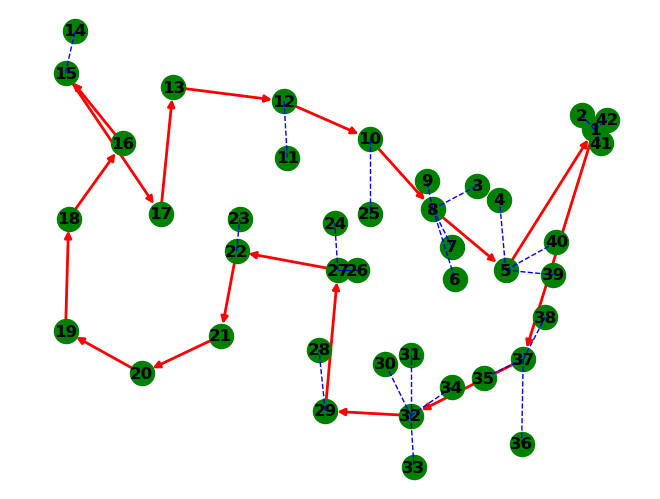

In [47]:
import tsplib95 
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from itertools import combinations
warnings.filterwarnings("ignore", category=Warning)
import matplotlib.pyplot as plt
import numpy as np
problem = tsplib95.load('dantzig42.tsp')
G = problem.get_graph()

pos = problem.display_data
for n, p in pos.items():
    G.nodes[n]['pos'] = p
    
    
    
tour = [8, 5, 1, 37, 32, 29, 27, 22, 21, 20, 19, 18, 16, 15, 17, 13, 12, 10]
G = nx.DiGraph()
for n, p in pos.items():
    G.add_node(n, pos=p)
for i in range(len(tour) - 1):
    G.add_edge(tour[i], tour[i + 1])
pos = nx.get_node_attributes(G, 'pos')


nx.draw(G, pos, with_labels=True, node_color='g', font_weight='bold', arrows=False, edge_color = "white")


path_edges = [(tour[n], tour[n + 1]) for n in range(len(tour) - 1) if tour[n] != tour[n+1]]
path_edges.append((tour[-1], tour[0])) # 添加初始点和最终点之间的边

nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2, 
                       arrowstyle='-|>', 
                       arrowsize=10)

for start, ends in edges_data:
    for end in ends:
        x = [pos[start][0], pos[end][0]]
        y = [pos[start][1], pos[end][1]]
        plt.plot(x, y, 'b--', linewidth=1.0)  
plt.savefig("FirstwayPlot3improv.jpg")
plt.show()

